DIS2D3FQMRTGT4J2YNZUS6XXSTG6TXAE


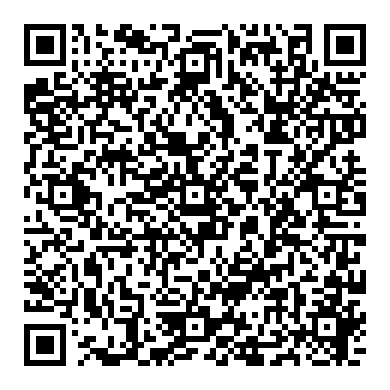

In [2]:
"""pyotp library needed for generating and creating TOTP and QR
png library for exporting QR code as png
IPython.display for printing PNG from within notebook
"""
import pyotp
import pyqrcode
import png
from IPython.display import Image

#Helper function used to generate 16 character base32 secret 
#Compatible with Google Auth and other OTP applications
base32_secret=pyotp.random_base32()
print(base32_secret)


#Similar to method above but secret is hex-encoded
hex_based_secret=pyotp.random_hex()


#credentials for creating TOTP
username="tinlt@fsoft.com"
organization="fptsoftware"


#URI needed to generate QR code
uri_link=pyotp.totp.TOTP(base32_secret).provisioning_uri(name=username, issuer_name=organization)


#Generating QR code from URI
url=pyqrcode.create(uri_link)
url.png('test.png',scale=6)
Image(filename='test.png')

In [4]:
#Refresh every 30 seconds to check with Google Auth App
#The outputs match each other
totp=pyotp.TOTP(base32_secret)
print("Current OTP:", totp.now())

Current OTP: 355138


In [5]:
#Using input to test whether the OTPs match
test_otp=input("Enter Google Auth input")
if test_otp==totp.now():
    print("Correct OTP")

Enter Google Auth input 536797


Correct OTP
